In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
import rushd as rd

sns.set_theme(style="ticks",font_scale=1.1)

In [7]:
figpath = '../figures/fig3/'

# Read FlowJo summary excel sheet to a pandas data frame
df = pd.read_csv(rd.datadir/'2023.01.30_Compiled.csv')
df = df.rename(columns={'Unnamed: 0':'Sample',
                        'Live/Single Cells/GFP+ | Freq. of Parent (%)':'GFP Freq. (%)',
                        'Live/Single Cells/GFP+ | Count':'GFP Count',
                        'Live/Single Cells/GFP+ Bright | Freq. of Parent (%)':'GFP Bright Freq. (%)',
                        'Live/Single Cells/GFP+ Bright | Count':'GFP Bright Count',
                        'Live/Single Cells/GFP+ Dim | Freq. of Parent (%)':'GFP Dim Freq. (%)',
                        'Live/Single Cells/GFP+ Dim | Count':'GFP Dim Count',
                        'Live/Single Cells | Count':'Single Cells Count',})

df['% GFP+ yield per MEF plated'] = (df['GFP Count'] / 10000 ) * 100
df['% GFP Bright yield per MEF plated'] = (df['GFP Bright Count'] / 10000 ) * 100

## Plot without averaging anything

In [8]:
# Calculate hyperP populations using these metrics
well_group = ['Experiment', 'Infection', 'dpi', 'Sample']
mean_df = df.groupby([*well_group]).mean(numeric_only=True)
mean_df = mean_df.reset_index()


rep_list = mean_df.Experiment.unique()
cond_list = mean_df.Infection.unique()

for (i, rep) in enumerate(rep_list):
    for (j, cond) in enumerate(cond_list):
        iMN_14dpi = np.mean(mean_df[(mean_df.Experiment == rep) & (mean_df.Infection == cond) & (mean_df.dpi == '14dpi')]['GFP Bright Freq. (%)'])
        mean_df.loc[(mean_df.Experiment == rep) & (mean_df.Infection == cond), '14 dpi GFP Bright Freq. (%)'] = float(iMN_14dpi)
        
mean_df.loc[:,'GFP Bright Freq. (%) rel. to 14dpi'] = mean_df.loc[:,'GFP Bright Freq. (%)']/mean_df.loc[:,'14 dpi GFP Bright Freq. (%)']*100

### % iMN yield

/Users/natwang/Documents/GitHub/article-prolif-TF-levels/env/lib/python3.9/site-packages/seaborn/utils.py:413: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


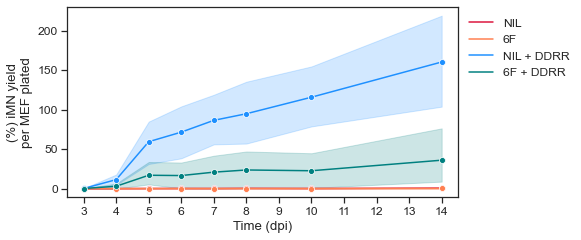

In [9]:
# mean + stddev plotting function
xcat="Days Post Infection"
ycat=r"% GFP Bright yield per MEF plated"
data=mean_df
hue='Infection'

fig_title=''
figsize=[7,3.5]
pal = {'NIL':'#dc143c', '6F':'#ff7f50', 'NIL RIDD-W':'#1e90ff','6F RIDD-W':'#008080'}
order=['NIL', '6F', 'NIL RIDD-W','6F RIDD-W']

fig, ax = plt.subplots(1, 1, figsize=figsize)
g = sns.lineplot(x=xcat, y=ycat, data=data, hue=hue,
    palette=pal, hue_order=order, marker="o")
# sns.scatterplot(x=xcat, y=ycat, data=data, hue=hue,
#     palette=pal, hue_order=order) #, style='Experiment'

g.set_xlabel('Time (dpi)')
g.set_ylabel('(%) iMN yield\nper MEF plated')
g.set_title(fig_title)

g.set_xlim([2.5, 14.5])
g.set_xticks([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# g.set_ylim([0, 2.3*10**4])
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Adjust legend
lmap = {'NIL':'NIL', 'NIL RIDD-W':'NIL + DDRR',
        '6F':'6F', '6F RIDD-W':'6F + DDRR',}
h,l = ax.get_legend_handles_labels()
sns.move_legend(ax, handles=h[:len(order)], labels=[lmap[i] for i in l[:len(order)]],
    title='', loc='upper left', bbox_to_anchor=(1,1), frameon=False)

# plt.savefig(figpath + '14dpi_eGFPbright-yield.svg', bbox_inches='tight')

### % iMN

/Users/natwang/Documents/GitHub/article-prolif-TF-levels/env/lib/python3.9/site-packages/seaborn/utils.py:413: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


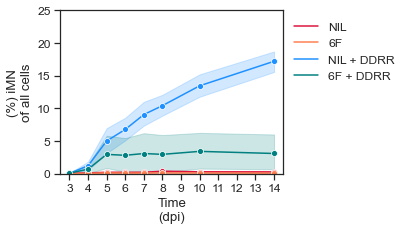

In [10]:
# mean + stddev plotting function
xcat="Days Post Infection"
ycat="GFP Bright Freq. (%)"
data=mean_df
hue='Infection'

fig_title=''
figsize=[4,3]
pal = {'NIL':'#dc143c', '6F':'#ff7f50', 'NIL RIDD-W':'#1e90ff','6F RIDD-W':'#008080'}
order=['NIL', '6F', 'NIL RIDD-W','6F RIDD-W']

fig, ax = plt.subplots(1, 1, figsize=figsize)
g = sns.lineplot(x=xcat, y=ycat, data=data, hue=hue,
    palette=pal, hue_order=order, marker="o")
# sns.scatterplot(x=xcat, y=ycat, data=data, hue=hue,
#     palette=pal, hue_order=order) #, style='Experiment'

g.set_xlabel('Time\n(dpi)')
g.set_ylabel('(%) iMN\nof all cells')
g.set_title(fig_title)

g.set_xlim([2.5, 14.5])
g.set_xticks([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
g.set_ylim([0, 25])
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Adjust legend
lmap = {'NIL':'NIL', 'NIL RIDD-W':'NIL + DDRR',
        '6F':'6F', '6F RIDD-W':'6F + DDRR',}
h,l = ax.get_legend_handles_labels()
sns.move_legend(ax, handles=h[:len(order)], labels=[lmap[i] for i in l[:len(order)]],
    title='', loc='upper left', bbox_to_anchor=(1,1), frameon=False)

plt.savefig(figpath + '14dpi_eGFPbright-percent.svg', bbox_inches='tight')

/Users/natwang/Documents/GitHub/article-prolif-TF-levels/env/lib/python3.9/site-packages/seaborn/utils.py:413: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


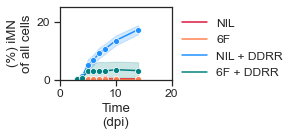

In [11]:
# mean + stddev plotting function
xcat="Days Post Infection"
ycat="GFP Bright Freq. (%)"
data=mean_df
hue='Infection'

fig_title=''
figsize=[2,1.333]
pal = {'NIL':'#dc143c', '6F':'#ff7f50', 'NIL RIDD-W':'#1e90ff','6F RIDD-W':'#008080'}
order=['NIL', '6F', 'NIL RIDD-W','6F RIDD-W']

fig, ax = plt.subplots(1, 1, figsize=figsize)
g = sns.lineplot(x=xcat, y=ycat, data=data, hue=hue,
    palette=pal, hue_order=order, marker="o")
# sns.scatterplot(x=xcat, y=ycat, data=data, hue=hue,
#     palette=pal, hue_order=order) #, style='Experiment'

g.set_xlabel('Time\n(dpi)')
g.set_ylabel('(%) iMN\nof all cells')
g.set_title(fig_title)

g.set_xlim([2.5, 14.5])
g.set_xticks([3, 14])
g.set_ylim([0, 25])
g.set_xticks([0, 10, 20])
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Adjust legend
lmap = {'NIL':'NIL', 'NIL RIDD-W':'NIL + DDRR',
        '6F':'6F', '6F RIDD-W':'6F + DDRR',}
h,l = ax.get_legend_handles_labels()
sns.move_legend(ax, handles=h[:len(order)], labels=[lmap[i] for i in l[:len(order)]],
    title='', loc='upper left', bbox_to_anchor=(1,1), frameon=False)

# Misc plotting stuff
plt.savefig(figpath + '14dpi_eGFPbright-percent-small_alt.svg', bbox_inches='tight')